####           Week 2:  E-tivity 2: Task 3
#### Prepared by : Damien Martin, Student ID: 10100913, Date Submitted: Work-in-Progress

This EDA imports and analyses the bank.csv data set with Python modules Pandas, Numpy, Matplotib and sklearn.

The following tasks will be completed
- Encoded all categorical attributes as numerical-DONE
- Filled in all missing values -DONE
- Apply a scaler to rescale features
- Treat outliers appropriately
- Create at least one new feature from the existing ones.
- Save the prepared dataset as a CSV file on your hard disk.

#### Import Python Modules and Dataset

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no


#### Check for missing values.

In [85]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Before we start transforming the dataset let's make a copy of it.

In [86]:
df_original = df

### 1.Encoding all categorical attributes as numerical

#### Encode categorical features with mapper

* marital - single 1, married 2
* education - primary 1, secondary 2, tertiary 3 
* month - Replace the month name with the month number
* contact - Celluar 1, Telephone 2
* poutcome - succeess 1, Failure 2, other 3

#### One hot encode categorical features with NaN's
* job 

#### Week 2:  E-tivity 2: Task 3
* default - Either Yes or No, replace with 1 or 0
* housing - Either Yes or No, replace with 1 or 0
* loan -    Either Yes or No, replace with 1 or 0
* subscribed - Either Yes or No, replace with 1 or 0



In [21]:
#df.drop (column'1',axis=1, inplace=True)
df.tail(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


#### Encode Ordinal Categorical Attributes 

In [87]:
# Create a mapper

scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}
df['education'] = df['education'].replace(scale_mapper)



df.tail(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [88]:
# Create a mapper

scale_mapper = {
    "cellular": 1,
    "telephone": 2
}
df['contact'] = df['contact'].replace(scale_mapper)



df.tail(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,1.0,22,sep,208,2,-1,0,NaN,yes


In [89]:
# Create a mapper

scale_mapper = {
    "single": 1,
    "married": 2,
    "divorced": 3
}
df['marital'] = df['marital'].replace(scale_mapper)



df.tail(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1999,40.0,entrepreneur,2,2.0,no,6403,no,no,1.0,22,sep,208,2,-1,0,NaN,yes


In [90]:
# Create a mapper

scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}
df['month'] = df['month'].replace(scale_mapper)



df.tail(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1999,40.0,entrepreneur,2,2.0,no,6403,no,no,1.0,22,9,208,2,-1,0,NaN,yes


In [91]:
# Create a mapper

scale_mapper = {
    "success": 1,
    "failure": 2,
    "other": 3
}
df['poutcome'] = df['poutcome'].replace(scale_mapper)



df.tail(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1999,40.0,entrepreneur,2,2.0,no,6403,no,no,1.0,22,9,208,2,-1,0,NaN,yes


#### One-Hot Encode All Other Categorical Attributes

In [92]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail(1)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
1999,40.0,2,2.0,no,6403,no,no,1.0,22,9,...,1,0,0,0,0,0,0,0,0,0


In [79]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,marital,education,balance,contact,day,month,duration,campaign,pdays,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,1,3.0,392,1.0,1,4,957,2,131,...,0,0,0,1,0,0,0,1,0,0
1,39.0,3,2.0,688,1.0,1,4,233,2,133,...,0,0,0,1,0,0,0,1,1,0
2,59.0,2,2.0,1035,1.0,1,4,126,2,239,...,0,0,0,0,0,0,0,1,1,0
3,47.0,2,2.0,398,1.0,1,4,274,1,238,...,0,0,0,0,0,0,0,1,1,0
4,54.0,2,2.0,1004,1.0,1,4,479,1,307,...,0,0,0,0,0,0,0,1,0,0


### 2.Fill in all missing values 

#### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [117]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                    0
marital                0
education            104
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome             454
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
dtype: int64

In [110]:
# Find the number of nulls/NaNs in the dataset
df['poutcome'].value_counts()

2.0    955
1.0    444
3.0    147
Name: poutcome, dtype: int64

#### The poutcome column is close to 25% missing data but becasue it does not reach this limit, we wont drop the column but must find a good way to input missing values

There are numerous ways to impute (i.e., fill in) the missing values in a numerical column, Looking at the missing values, I think one column that could be filled in by median. Over 90% of the contacts are cellular and if we were to fill with the median value, we might expect to have the same distribution as the rest of the data. This is clearly not ideal but it is diffcult to ascertain whether any other method for filling in missing data would be more accurate.

In [105]:
df['contact'].fillna(df['contact'].mean(), inplace=True)
df.describe()

,age,marital,education,balance,contact,day,month,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
count,1988.000000,2000.00000,1896.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,41.753018,1.77050,2.246308,1413.663500,1.080708,13.851500,5.002500,292.020500,1.909500,167.896000,...,0.02250,0.017500,0.230500,0.081000,0.032000,0.082500,0.04800,0.174000,0.034500,0.005000
std,12.724358,0.62612,0.644020,3131.224213,0.259118,9.712189,3.079974,221.557295,1.378862,131.754126,...,0.14834,0.131158,0.421258,0.272903,0.176044,0.275194,0.21382,0.379204,0.182555,0.070551
min,18.000000,1.00000,1.000000,-980.000000,1.000000,1.000000,1.000000,7.000000,1.000000,-1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.000000,1.00000,2.000000,201.500000,1.000000,5.000000,2.000000,146.000000,1.000000,75.750000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,38.000000,2.00000,2.000000,551.000000,1.000000,12.000000,5.000000,236.000000,1.000000,182.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,50.000000,2.00000,3.000000,1644.500000,1.000000,23.000000,7.000000,379.000000,2.000000,251.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,93.000000,3.00000,3.000000,81204.000000,2.000000,31.000000,12.000000,1823.000000,11.000000,854.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [106]:
df. isna().sum()

age                   12
marital                0
education            104
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome             454
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
dtype: int64

Imputing missing values with the mean (alternatively, the media, the most frequent, or a constant) may introduce bias in the dataset. A better method is to build an ML model (typically, kNN) to predict `LoanAmount` on the basis of other columns.

Since, the purpose now is to practice data munging prior applying ML algorithms, we can take an approach, which lies somewhere in between these 2 extremes. We may hypothesise that attributes `Education` and `Self_Employed` combined can give a good estimate of `LoanAmount`.

First, let us look at the following boxplots to see if a trend exists:

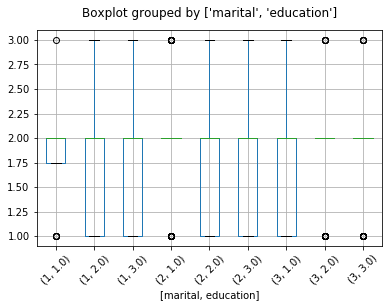

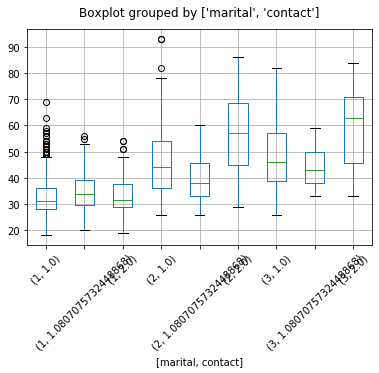

In [119]:
df.boxplot(column='poutcome', by=['marital','education'], rot=45)
plt.title("") 
plt.show()

df.boxplot(column='age', by=['marital','contact'], rot=45)
plt.title("")
plt.show()




We can see some variation in the median of `LoanAmount` for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

In [10]:
ptable = df.pivot_table(values='LoanAmount', 
                        index='Self_Employed_Yes',
                        columns='Education_Not Graduate',  
                        aggfunc=np.median)
ptable

Education_Not Graduate,0,1
Self_Employed_Yes,,
0,130.0,113.0
1,157.5,130.0


Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `LoanAmount`.

In [11]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['Self_Employed_Yes'], x['Education_Not Graduate']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(get_element, axis=1), inplace=True)

#### I am going to use a simplistic metod to fill in age

In [114]:
df['age'].fillna(df['age'].median(), inplace=True)

In [118]:
df.isna().sum()

age                    0
marital                0
education            104
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome             454
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
dtype: int64

### 3. Rescaling Features

Many ML algorithms assume that all numerical features are on the same scale. Two standard techniques in the Python module `scikit-learn` for achieving this are:
* MinMaxScaler - rescales a column to the interval [0,1]
* StandardScaler - rescales a numerical column so that it has mean 0 and standard deviation 1.

Here we use a third technique, called `RobustScaler` to `LoanAmount` and `ApplicantIncome` which does a better job in the presence of outliers (we observed outliers in columns `LoanAmount` and `ApplicantIncome`). `RobustScaler` transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

We will deal with `CoapplicantIncome` and `Loan_Amount_Term` later. Note that all other attributes are binary.

In [13]:
robust_scaler = RobustScaler()
df[['ApplicantIncome',
    'LoanAmount']] = robust_scaler.fit_transform(df[['ApplicantIncome',
                                                     'LoanAmount']])

To bring column `Dependents` to the interval $[0,1]$ we can simply divide it by 3, as it is an ordinal columns with four possible values: 0, 1, 2 and 3.

In [14]:
df['Dependents'] = df['Dependents']/3

## 4.Treatment of Outliers

Lets look in age and balance 

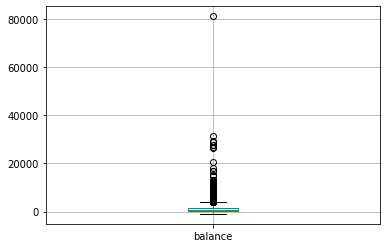

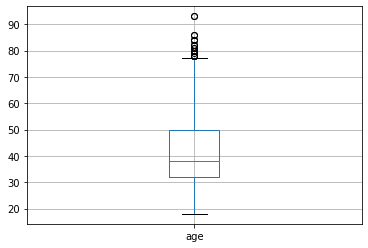

In [123]:
df.boxplot(column=['balance'])
plt.show()

df.boxplot(column=['age'])
plt.show()

#### Let's also take a look at their histograms.

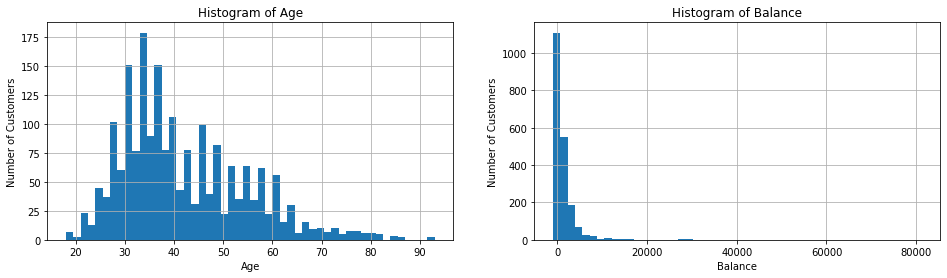

In [127]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age")
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=50)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Balance")
ax3.set_xlabel('Balance')
ax3.set_ylabel('Number of Customers')
df['balance'].hist(bins=50)

plt.show()

#### For age this looks like a normal distribution (skewed to the right as you might expect) and i dont see the older customers as outliers more like a typical distribution in this parameter

#### For balance, there seems to some extreme outliers and it might be argued that these should be removed.

Finally, before treating the outliers, let's find the minimum values in these columns.

#### `Loan_Amount_Term`

Let's examine the distribution of values in `Loan_Amount_Term`. 

In [128]:
# identify outliers with standard deviation
from numpy import mean
from numpy import std
# calculate summary statistics
data = df['balance']
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 1971


In [129]:
# identify outliers with standard deviation
from numpy import mean
from numpy import std
# calculate summary statistics
data = df['balance']
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 5
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 10
Non-outlier observations: 1990


In [149]:
# identify outliers with standard deviation
from numpy import mean
from numpy import std
# calculate summary statistics
data = df['balance']
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 1
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed)
df['balance']=df['balance']-outliers

SyntaxError: invalid syntax (<ipython-input-149-fb94cedcad7c>, line 16)

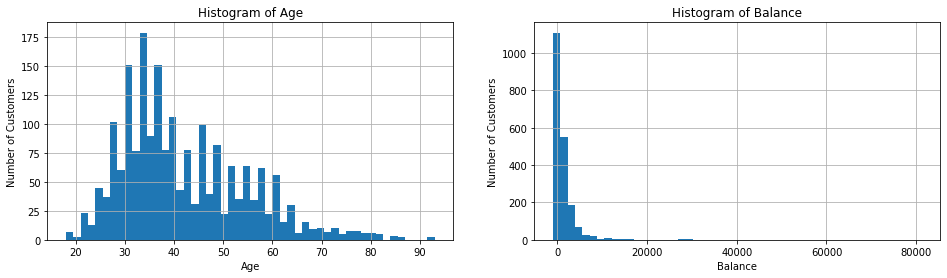

In [144]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age")
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Customers')
df['age'].hist(bins=50)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Balance")
ax3.set_xlabel('Balance')
ax3.set_ylabel('Number of Customers')
df['balance'].hist(bins=50)

plt.show()

Note that `Loan_Amount_Term` is rather an ordinal than a continuous numerical feature with more than 80% of its values being 360.0. None of its values appear to be actual outliers. To bring it to the interval $[0,1]$ we can divide all values by 480 (effectively applying MinMaxScaler to it). If we applied RobustScaler and/or log transformation to it instead then it would become even more skewed to the right (you may verify this).

## 5. Creation of Derived Features

Column `CoapplicantIncome` contains many zeros which can be interpreted as `there is no co-applicant with income greater than 0`. The zeros are *missing values* which should not be filled in because they are missing for a reason. On the other hand, they skew the feature towards 0 and this cannot be easily fixed with a log transformation.

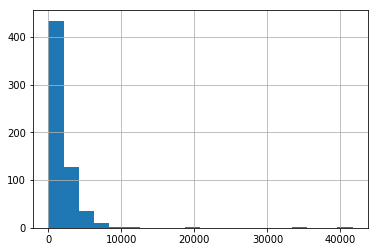

In [22]:
df['CoapplicantIncome'].hist(bins=20)
plt.show()

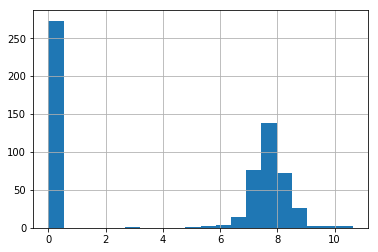

In [23]:
np.log(df['CoapplicantIncome']+1).hist(bins=20)
plt.show()

What we can do in this case instead is:
* Create a new feature `TotalIncome` as the sum of the *original* `ApplicantIncome` and `CoapplicantIncome`
* Drop column `CoapplicantIncome` because it can be derived from `ApplicantIncome` and `CoapplicantIncome`.

In [24]:
# Create TotalIncome column and apply a log transformation
df['TotalIncome'] = df_original['ApplicantIncome'] + df_original['CoapplicantIncome']
df[['TotalIncome']] = robust_scaler.fit_transform(df[['TotalIncome']])
df[['TotalIncome']].min()

TotalIncome   -1.184385
dtype: float64

In [25]:
df['TotalIncome'] = np.log(df['TotalIncome']+2.19)

Let's plot `TotalIncome`.

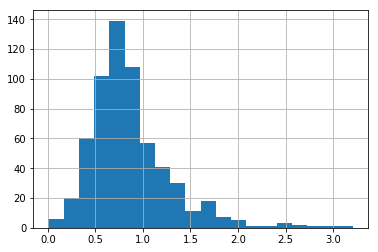

In [26]:
df['TotalIncome'].hist(bins=20)
plt.show()

Let's drop `CoapplicantIncome`.

In [27]:
df.drop('CoapplicantIncome', axis=1, inplace=True)

## 6. Save the Prepared Dataset

Finally, let's save the prepared dataset as a CSV file.

In [18]:
df.to_csv('loans_train_prepared.csv')